In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv('Data/Ecommerce_Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


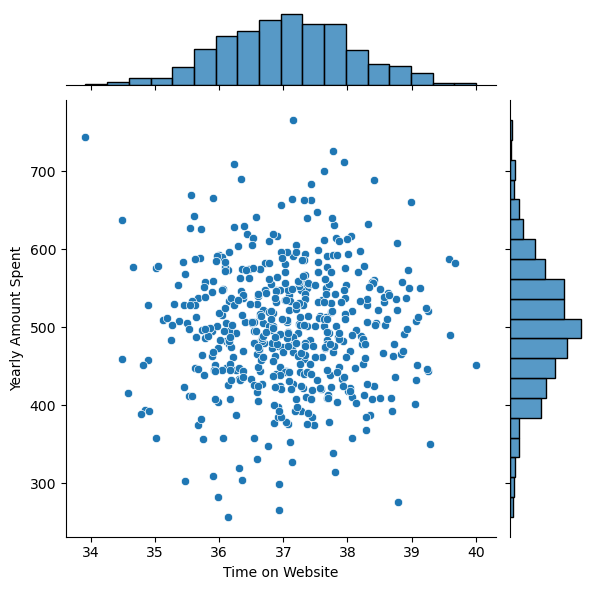

In [5]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

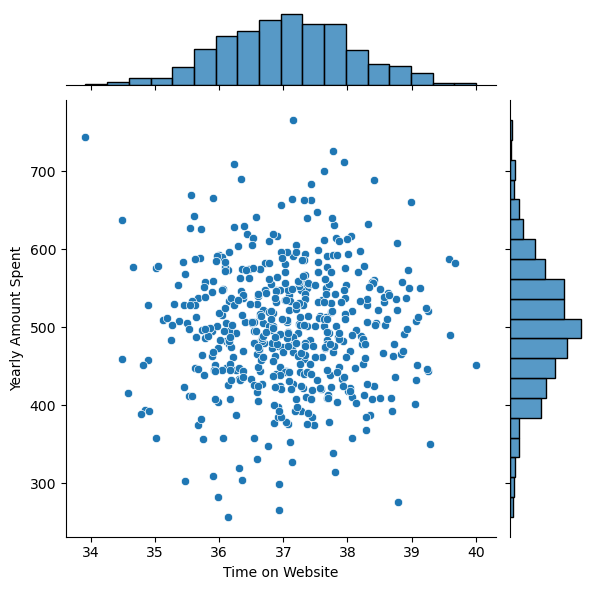

In [6]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

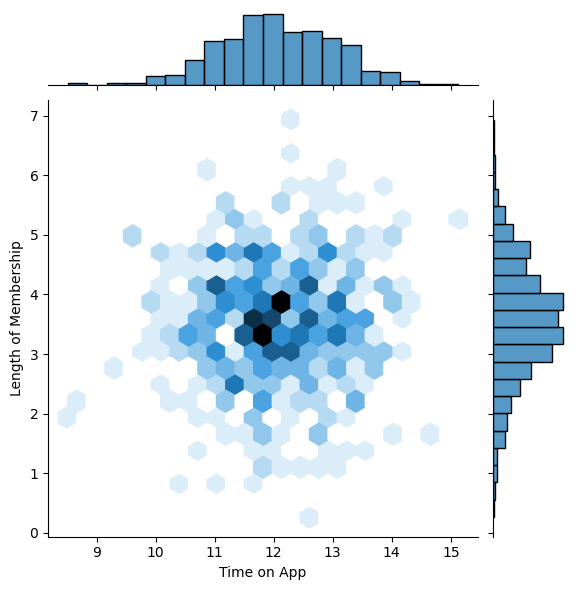

In [7]:
sns.jointplot(data=df,x='Time on App',y='Length of Membership',kind="hex")

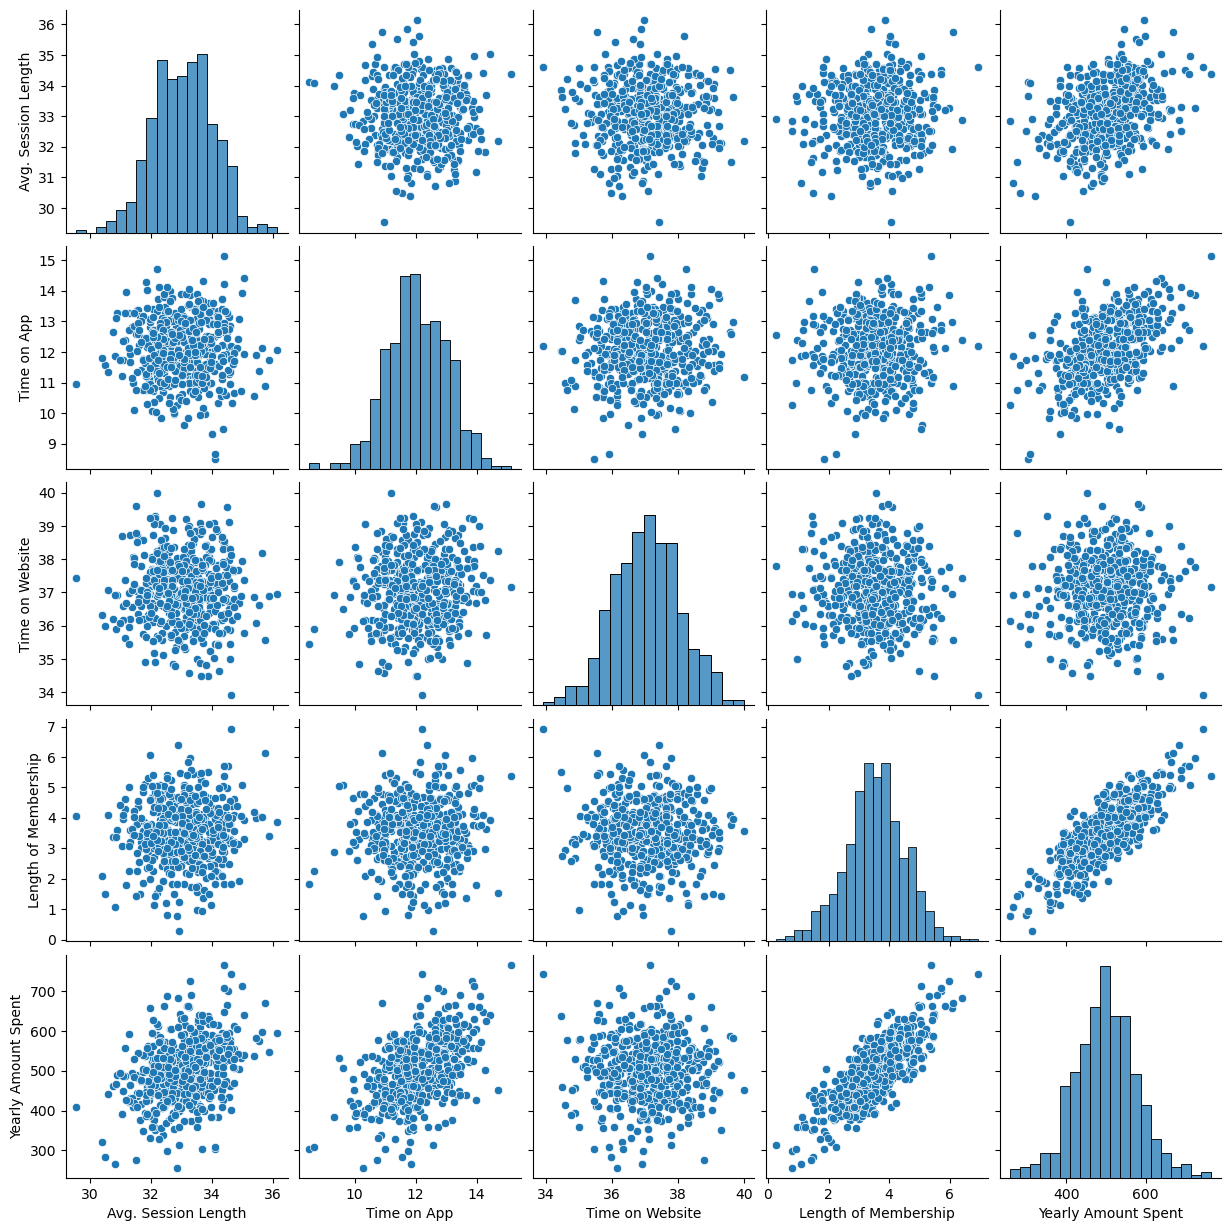

In [8]:
sns.pairplot(df)

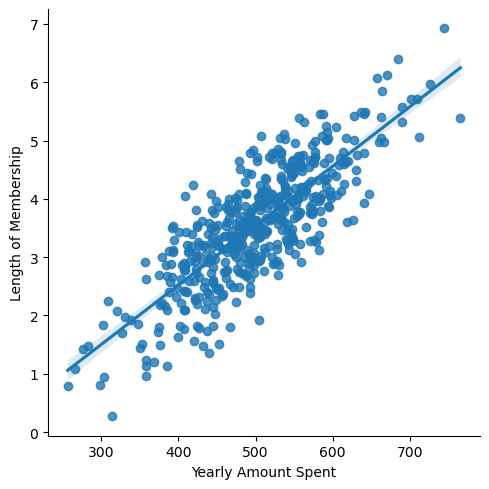

In [9]:
sns.lmplot(data=df,x='Yearly Amount Spent',y='Length of Membership')

In [10]:
#Preparing the data to be passed into the model

x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)


In [12]:
lm = LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

In [13]:
coef = pd.DataFrame(lm.coef_,x.columns,['Coefficient'])
coef

,Coefficient
Avg. Session Length,26.155324
Time on App,38.620085
Time on Website,0.317603
Length of Membership,61.820394


<AxesSubplot:xlabel='Yearly Amount Spent'>

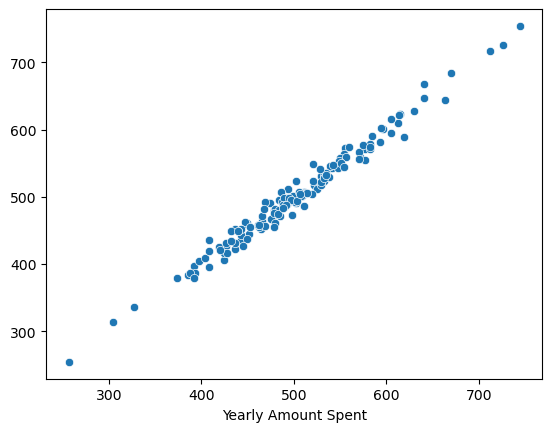

In [15]:
predictions = lm.predict(x_test)

sns.scatterplot(x=y_test,y=predictions)

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.51179029096587
MSE: 114.37618082343688
RMSE: 10.694680024359629


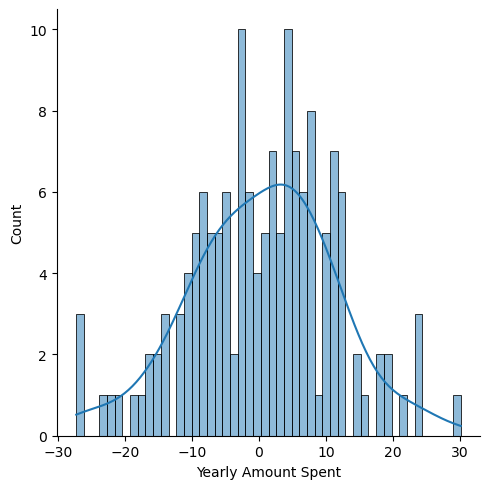

In [22]:
residuo = y_test - predictions
sns.displot(residuo, bins = 50, kde = True)